In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns           

import numpy as np

import scipy.stats as stats
import math

pd.set_option('display.max_rows',1600)
pd.set_option('display.max_columns',1600)


In [2]:
ClaimsFraud_df=pd.read_csv('ClaimsFraud_train.csv', error_bad_lines=False)

ClaimsFraud_df

ClaimsFraud_df.shape

b'Skipping line 188321: expected 132 fields, saw 133\nSkipping line 188322: expected 132 fields, saw 133\nSkipping line 188323: expected 132 fields, saw 133\nSkipping line 188324: expected 132 fields, saw 133\nSkipping line 188325: expected 132 fields, saw 133\nSkipping line 188326: expected 132 fields, saw 133\nSkipping line 188327: expected 132 fields, saw 133\nSkipping line 188328: expected 132 fields, saw 133\nSkipping line 188329: expected 132 fields, saw 133\nSkipping line 188330: expected 132 fields, saw 133\nSkipping line 188331: expected 132 fields, saw 133\nSkipping line 188332: expected 132 fields, saw 133\nSkipping line 188333: expected 132 fields, saw 133\nSkipping line 188334: expected 132 fields, saw 133\nSkipping line 188335: expected 132 fields, saw 133\nSkipping line 188336: expected 132 fields, saw 133\nSkipping line 188337: expected 132 fields, saw 133\nSkipping line 188338: expected 132 fields, saw 133\nSkipping line 188339: expected 132 fields, saw 133\nSkipping l

(188319, 132)

In [3]:
ClaimsFraud_df.columns = ClaimsFraud_df.columns.str.strip()
ClaimsFraud_df.head()
y=ClaimsFraud_df['loss']
ClaimsFraud_df.drop(columns='loss',inplace=True)
ClaimsFraud_df.shape

(188319, 131)

In [4]:
missing_value_df=pd.DataFrame({'Column_Name':ClaimsFraud_df.columns,
                             'missing_value_count':ClaimsFraud_df.isnull().sum(),
                             'missing_value_percent':ClaimsFraud_df.isnull().sum()/ClaimsFraud_df.shape[0]*100})

missing_value_df.sort_values(by='missing_value_percent',ascending=False)

cols_drop=list(missing_value_df[missing_value_df['missing_value_percent']>50]['Column_Name'])

cols_drop

[]

In [5]:
for col in ClaimsFraud_df.columns:
    if ClaimsFraud_df[col].nunique()==ClaimsFraud_df.shape[0] or ClaimsFraud_df[col].nunique()==1:
        cols_drop.append(col)
cols_drop

['id']

In [6]:
ClaimsFraud_df.drop(columns=cols_drop,inplace=True)
ClaimsFraud_df.shape

(188319, 130)

In [7]:
ClaimsFraud_df.corr()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(ClaimsFraud_df,y,test_size=0.2,random_state=43)

X_train.shape

(150655, 130)

In [10]:
for col in X_train.columns:
    if X_train[col].dtype=='object':
        X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
        X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
    
    else:
        X_train[col]=X_train[col].fillna(X_train[col].mean())
        X_test[col]=X_test[col].fillna(X_train[col].mean())
        Y_train=Y_train.fillna(Y_train.mean())
X_train.dtypes

cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat40      object
cat41      object
cat42      object
cat43      object
cat44      object
cat45      object
cat46      object
cat47      object
cat48      object
cat49      object
cat50      object
cat51      object
cat52      object
cat53      object
cat54      object
cat55      object
cat56     

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
    
mm=MinMaxScaler()
le=LabelEncoderExt()
sc=StandardScaler()
for col in X_train.columns:
    if X_train[col].dtype=='object':
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])
    else:
        sc.fit([X_train[col]])
        X_train[col]=sc.fit_transform(np.array(X_train[col]).reshape(-1,1))
        X_test[col]=sc.transform(np.array(X_test[col]).reshape(-1,1))


In [12]:
Y_train.isnull().sum()

0

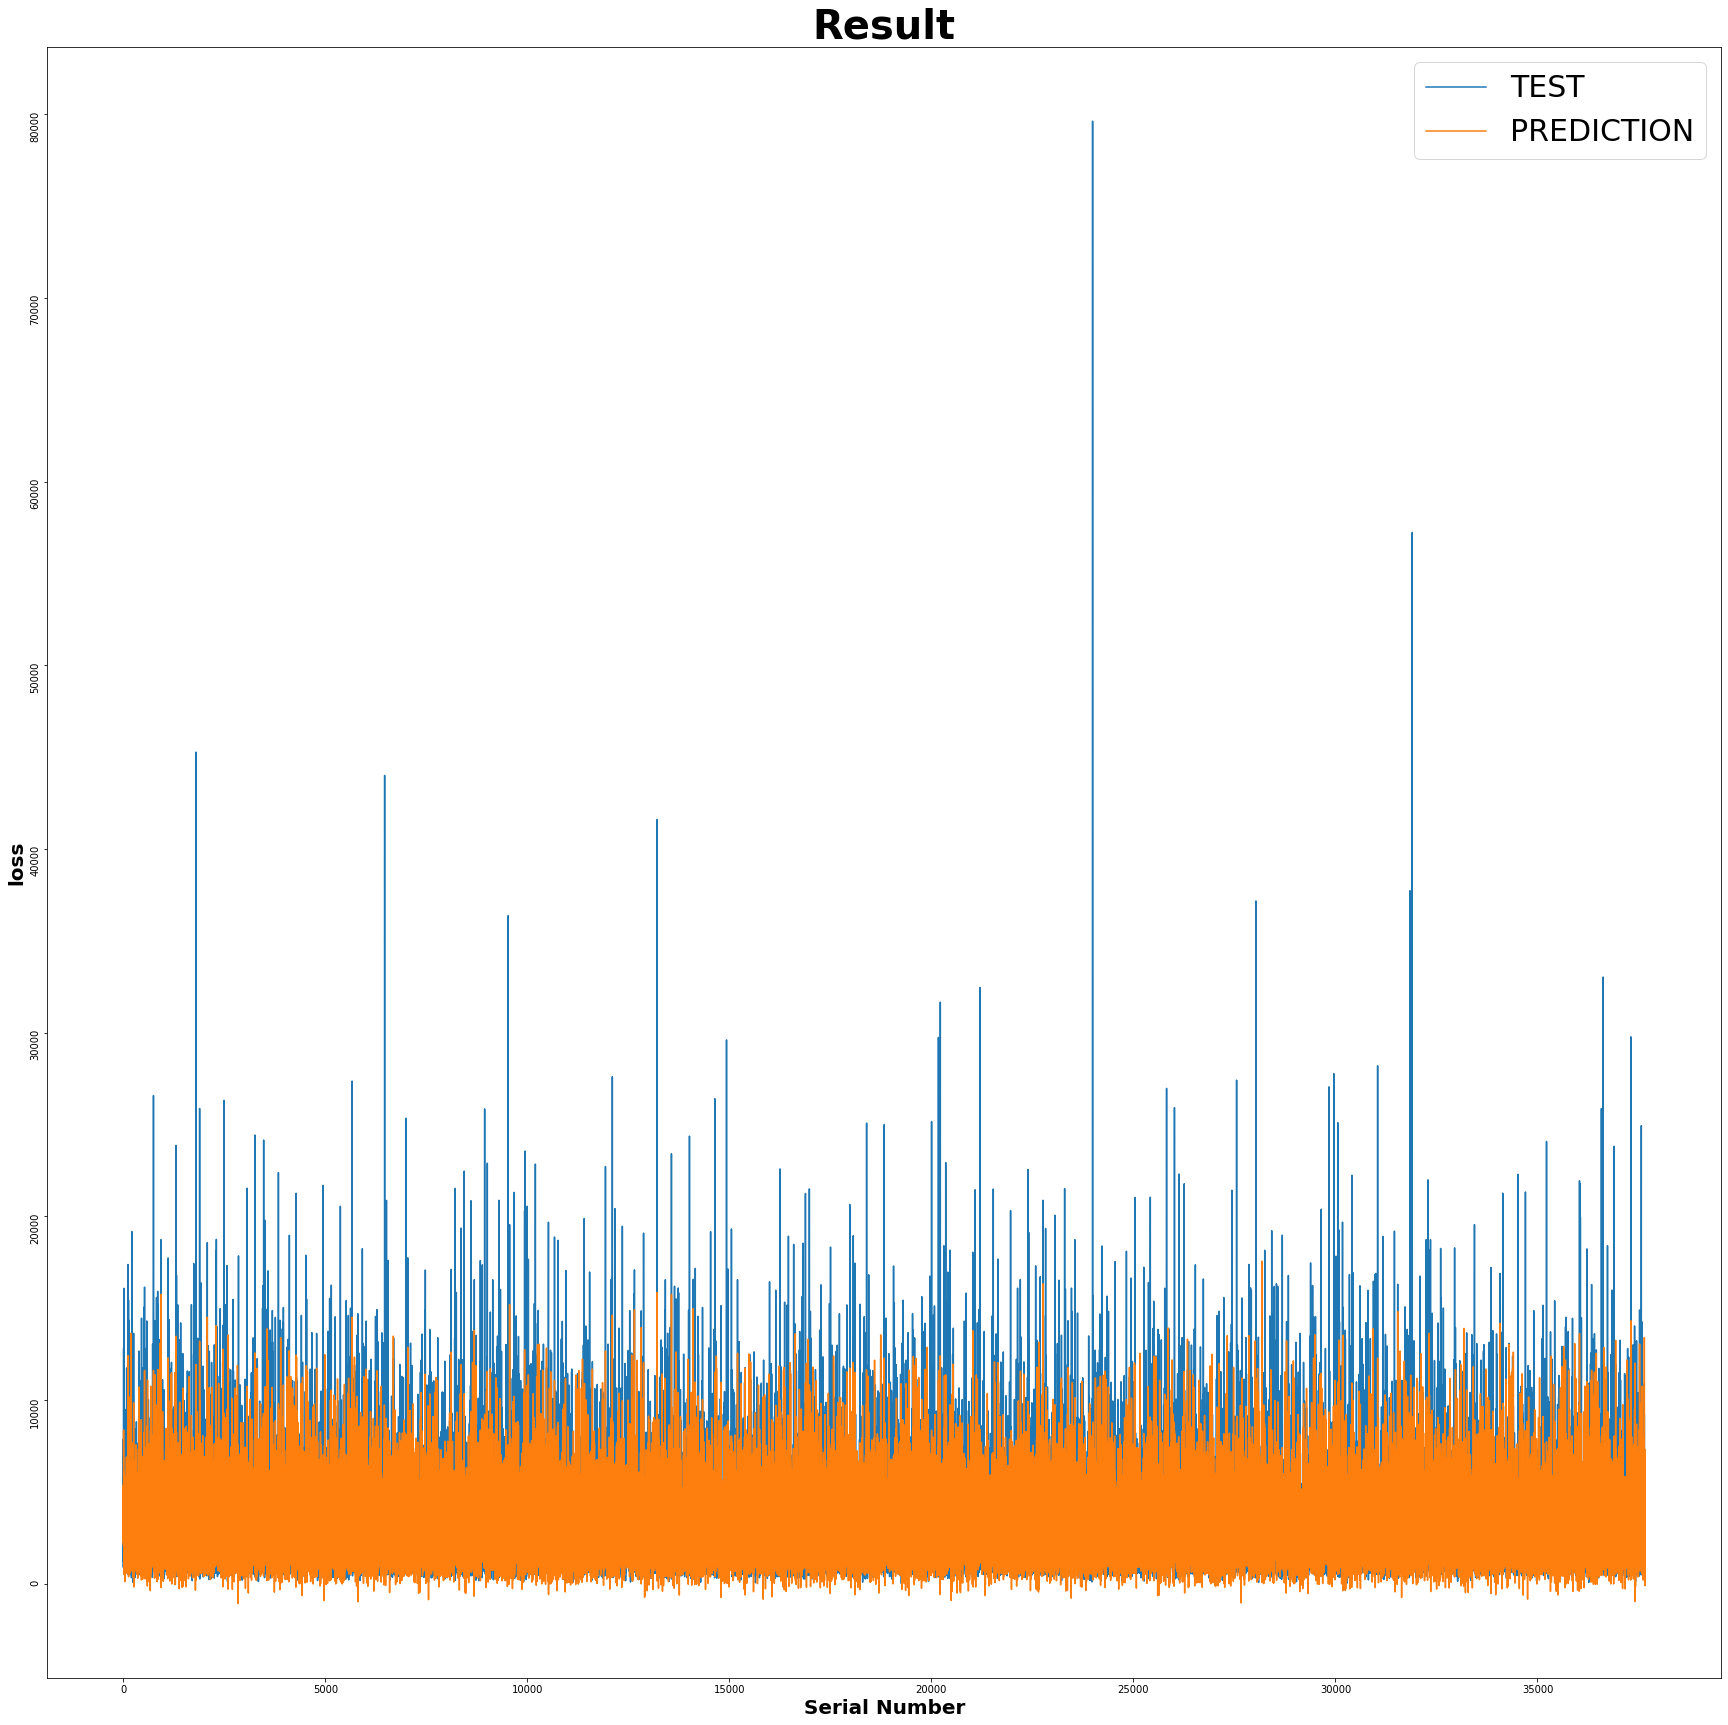

In [15]:
from sklearn.linear_model import LinearRegression

ligReg = LinearRegression()

ligReg.fit(X_train, Y_train)

Y_predict = ligReg.predict(X_test)

res = pd.DataFrame({
    'sno': np.arange(1,len(Y_predict)+1),
    'ytest': Y_test,
    'ypredict': Y_predict
})

plt.figure(figsize=(30,30))
plt.title('Result', fontweight="bold", fontsize=40)
plt.xlabel('Serial Number', fontweight="bold", fontsize=20)
plt.ylabel('loss', fontweight="bold", fontsize=20)
plt.yticks(rotation='vertical')
plt.plot(res['sno'],res['ytest'], label='TEST')
plt.plot(res['sno'],res['ypredict'], label='PREDICTION')
plt.legend(loc=1, prop={'size': 30})

plt.show()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_test, Y_predict))

print(mean_squared_error(Y_test, Y_predict))

print(ligReg.score(X_train, Y_train))

print(ligReg.score(X_test, Y_test))


0.4891691775674847
4218477.92399964
0.4810743658304014
0.4891691775674847
